# data preprocessing

In [2]:
# Python Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

# Read .csv file

In [3]:
data = pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
X = data.iloc[:,:-1].values
print(X)

[[1 0 3 ... 'A/5 21171' 7.25 nan]
 [2 1 1 ... 'PC 17599' 71.2833 'C85']
 [3 1 3 ... 'STON/O2. 3101282' 7.925 nan]
 ...
 [889 0 3 ... 'W./C. 6607' 23.45 nan]
 [890 1 1 ... '111369' 30.0 'C148']
 [891 0 3 ... '370376' 7.75 nan]]


In [8]:
Y = data.iloc[:,4]
print(Y)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


# Missing Value Detection and Imputation

In [10]:
data1 = pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/train.csv')
data1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(data['Cabin'].isnull())

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool


In [12]:
print(data.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [29]:
missing_value = ["n/a","na","--"]
data2 = pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/train.csv', na_values = missing_value)


In [14]:
print(data['Embarked'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool


In [15]:
count = 0
for row in data['Cabin']:
    try:
        int(row)
        data.loc[count, 'Cabin'] = np.nan
    except ValueError:
        pass
    count+=1


In [16]:
print(data['Cabin'].isnull())

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool


In [17]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
print(data.isnull().values.any())

True


In [28]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
median = data['NUM_BEDROOMS'].median()
data['NUM_BEDROOMS'].fillna(median, inplace=True)
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


# Categorical Variable Encoding

In [145]:
data = pd.read_csv('MallCustomers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [146]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,4].values

In [147]:
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X

array([[1, 1, 19, 15],
       [2, 1, 21, 15],
       [3, 0, 20, 16],
       [4, 0, 23, 16],
       [5, 0, 31, 17],
       [6, 0, 22, 17],
       [7, 0, 35, 18],
       [8, 0, 23, 18],
       [9, 1, 64, 19],
       [10, 0, 30, 19],
       [11, 1, 67, 19],
       [12, 0, 35, 19],
       [13, 0, 58, 20],
       [14, 0, 24, 20],
       [15, 1, 37, 20],
       [16, 1, 22, 20],
       [17, 0, 35, 21],
       [18, 1, 20, 21],
       [19, 1, 52, 23],
       [20, 0, 35, 23],
       [21, 1, 35, 24],
       [22, 1, 25, 24],
       [23, 0, 46, 25],
       [24, 1, 31, 25],
       [25, 0, 54, 28],
       [26, 1, 29, 28],
       [27, 0, 45, 28],
       [28, 1, 35, 28],
       [29, 0, 40, 29],
       [30, 0, 23, 29],
       [31, 1, 60, 30],
       [32, 0, 21, 30],
       [33, 1, 53, 33],
       [34, 1, 18, 33],
       [35, 0, 49, 33],
       [36, 0, 21, 33],
       [37, 0, 42, 34],
       [38, 0, 30, 34],
       [39, 0, 36, 37],
       [40, 0, 20, 37],
       [41, 0, 65, 38],
       [42, 1, 24, 38],
 

## One Hot Encoding

In [148]:
from sklearn.preprocessing import OneHotEncoder
onehotencod = OneHotEncoder(categorical_features = [1])

In [149]:
X = onehotencod.fit_transform(X).toarray()
X

array([[   0.,    1.,    1.,   19.,   15.],
       [   0.,    1.,    2.,   21.,   15.],
       [   1.,    0.,    3.,   20.,   16.],
       [   1.,    0.,    4.,   23.,   16.],
       [   1.,    0.,    5.,   31.,   17.],
       [   1.,    0.,    6.,   22.,   17.],
       [   1.,    0.,    7.,   35.,   18.],
       [   1.,    0.,    8.,   23.,   18.],
       [   0.,    1.,    9.,   64.,   19.],
       [   1.,    0.,   10.,   30.,   19.],
       [   0.,    1.,   11.,   67.,   19.],
       [   1.,    0.,   12.,   35.,   19.],
       [   1.,    0.,   13.,   58.,   20.],
       [   1.,    0.,   14.,   24.,   20.],
       [   0.,    1.,   15.,   37.,   20.],
       [   0.,    1.,   16.,   22.,   20.],
       [   1.,    0.,   17.,   35.,   21.],
       [   0.,    1.,   18.,   20.,   21.],
       [   0.,    1.,   19.,   52.,   23.],
       [   1.,    0.,   20.,   35.,   23.],
       [   0.,    1.,   21.,   35.,   24.],
       [   0.,    1.,   22.,   25.,   24.],
       [   1.,    0.,   23.,   4

# Train Test Split

In [46]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,8].values
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [47]:
np.set_printoptions(edgeitems=127)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)
print(X_train)

[[ 6.63180286e-01  1.07100583e+00  4.84624149e-01  1.27038568e+00
   4.92323006e-01  1.74374467e+00  2.88442161e-01 -5.16218670e-01]
 [-1.14388789e+00 -1.36228772e+00  9.70832037e-01  5.21928803e-01
  -3.60581248e-01  6.04244785e-01 -1.17201630e-01 -1.03681806e+00]
 [ 6.08242274e-02 -8.17998370e-01 -3.90550049e-01  7.09043021e-01
  -7.01742949e-01  4.18456761e-01 -5.61337166e-01 -4.29452105e-01]
 [ 3.62002256e-01 -6.89930288e-01 -6.82274782e-01  4.59557397e-01
   6.16758125e-03  2.45054605e-01  7.52571030e-02 -2.55918974e-01]
 [ 6.08242274e-02  2.70580324e-01 -3.90550049e-01 -5.38385102e-01
   1.26846588e+00 -5.60026832e-01  1.58162403e-01 -1.69152408e-01]
 [-2.40353802e-01  1.35915902e+00  9.56578386e-02 -1.64156665e-01
   1.93806517e-01 -5.22062330e-02 -6.08711624e-01 -4.29452105e-01]
 [-5.41531831e-01  7.84782015e-02 -9.73999515e-01  7.09043021e-01
   7.05549069e-01  1.24830994e+00  1.37436078e-01 -6.02985236e-01]
 [ 1.26553634e+00 -4.97828166e-01  1.55428150e+00  9.58528646e-01
  -

# Outlier Detection

In [66]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [67]:
boston = pd.DataFrame(boston.data)
boston.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Outlier Detection through Boxplot

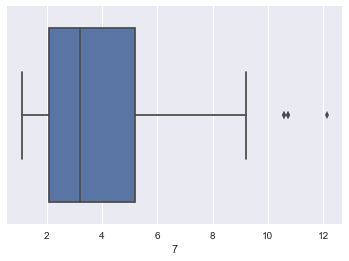

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=boston[7])

In [27]:
# Outlier Detection Part 2
boston_c = boston

## Outlier Detection through Scatter Plot

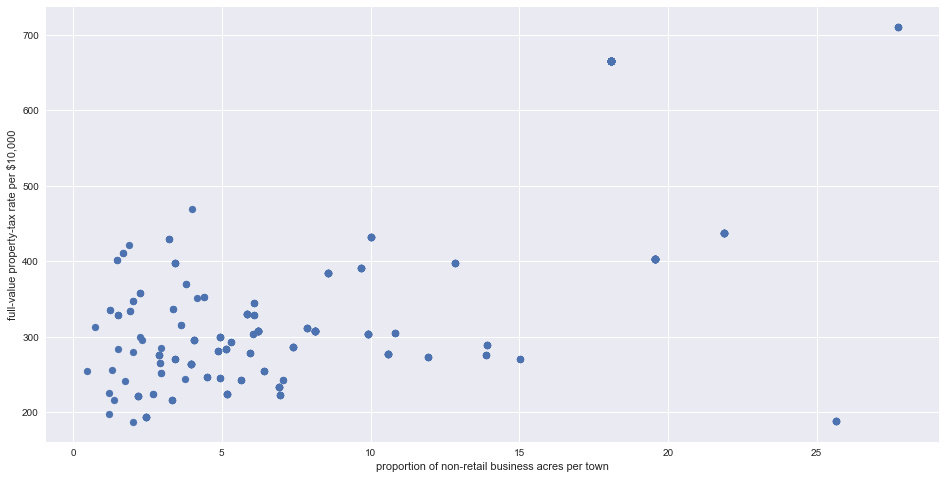

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_c[2], boston_c[9])
ax.set_xlabel('proportion of non-retail business acres per town')
ax.set_ylabel('full-value property-tax rate per $10,000')
plt.show()

## Outlier Detection through Mathematical Method (Z-Score)

In [31]:
from scipy import stats
zscore = np.abs(stats.zscore(boston_c))
print(zscore)

[[ 0.41771335  0.28482986  1.2879095  ...,  1.45900038  0.44105193
   1.0755623 ]
 [ 0.41526932  0.48772236  0.59338101 ...,  0.30309415  0.44105193
   0.49243937]
 [ 0.41527165  0.48772236  0.59338101 ...,  0.30309415  0.39642699
   1.2087274 ]
 ..., 
 [ 0.41137448  0.48772236  0.11573841 ...,  1.17646583  0.44105193
   0.98304761]
 [ 0.40568883  0.48772236  0.11573841 ...,  1.17646583  0.4032249
   0.86530163]
 [ 0.41292893  0.48772236  0.11573841 ...,  1.17646583  0.44105193
   0.66905833]]


In [32]:
threshold = 3
print(np.where(zscore > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [33]:
print(zscore[102][11])

3.13442532791


## Outlier Detection through Mathematical Method (Inter Quartile Range)

In [35]:
boston_iqr = boston
Q1 = boston_iqr.quantile(0.25)
Q3 = boston_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       3.565378
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [40]:
print(boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: Could not compare [None] with block values

## Handle Outliers/Correct Outliers

In [41]:
boston_clean = boston
boston_clean = boston_clean[(zscore < 3).all(axis=1)]

In [42]:
boston.shape

(506, 13)

In [43]:
boston_clean.shape

(415, 13)

In [46]:
#Remove Outliers using IQR
boston_iqr_clean = boston_iqr[~((boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
